# Lending Club
___

** Introduction**

We will use 2007-2011'ish Lending Club loan data to exemplify our abilities in:

- SQL querying

- Fintech (Finance)

- Analysis

[Lending Club](https://www.lendingclub.com/) is headquarted in San Francisco, Ca. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans. Lending Club is the world's largest peer-to-peer lending platform

**Dedication**

I dedicate this to every day that I am not able to implement my abilities to better aid company issues, through data.

Though,

_"It is not the mountain we conquer but ourselves."_

_\- Sir Edmund Hillary_

___

![LC Logo]('Images/LC.jpeg')

## Imports

In [147]:
import sqlite3 as sql #SQL Library for Python

import pandas as pd #Create dataframe structure
                    #Also utilized take dataframe to sql
import pprint

In [83]:
loan_data = pd.read_csv('Data/LoanStats3a.csv.zip', compression= 'zip', skiprows=1)
reject_data = pd.read_csv('Data/RejectStatsA.csv.zip',compression='zip', skiprows = 1)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2683: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Query Analysis

We Establish a connection with the lc_loans database. From creating this database, we conveniently convert the pandas dataframe to a sql table.

> Wait, what's the point of querying in SQL when we can filter through the pandas dataframe?

> This project is SQL driven. I provide the opportunity for the reader to be exposed in importing the data, and then somehow pushing that data to a database. Moreover, the reader has the opportunity to query within Python, using SQLite! 

> There are several other methods to do this, but this is the most convenient, under my own time constraints.

In [88]:
conn = sql.connect('DataBase/lc_loans.db') #Establish connection to database

In [89]:
c = conn.cursor() #pointer/cursor utilized in database to obtain information

### Loan Data

Questions:

1. What is the average interest rate, payment, and loan given by:
    a. Zipcode?
    
    b. Purpose?
    
    c. State?
    
    d. Annual Income?

2. What's a common type of payment plan?

3. If a person is delinquent, do they have some window of opportunity to get second loan?

4. How do Lending Club borrowers usually apply?

5. At what rate do Lending Club borrowers pay back loans?

6. If a person was a part of the collection cycle, what is:
    a. Their average payment of collection fees?
    
    b. the recovered amount with respect to the total loan?
    
    c. the percentage that would be a chargeoff case?
7. Has a  borrower once been rejected, but then a

In [90]:
loan_data.to_sql(name = "loans",con = conn)

In [145]:
query_loans_pragma = 'PRAGMA table_info(loans)'
c.execute(query_loans_pragma)
rows = c.fetchall()
print(rows)

[(0, 'index', 'INTEGER', 0, None, 0), (1, 'id', 'TEXT', 0, None, 0), (2, 'member_id', 'REAL', 0, None, 0), (3, 'loan_amnt', 'REAL', 0, None, 0), (4, 'funded_amnt', 'REAL', 0, None, 0), (5, 'funded_amnt_inv', 'REAL', 0, None, 0), (6, 'term', 'TEXT', 0, None, 0), (7, 'int_rate', 'TEXT', 0, None, 0), (8, 'installment', 'REAL', 0, None, 0), (9, 'grade', 'TEXT', 0, None, 0), (10, 'sub_grade', 'TEXT', 0, None, 0), (11, 'emp_title', 'TEXT', 0, None, 0), (12, 'emp_length', 'TEXT', 0, None, 0), (13, 'home_ownership', 'TEXT', 0, None, 0), (14, 'annual_inc', 'REAL', 0, None, 0), (15, 'verification_status', 'TEXT', 0, None, 0), (16, 'issue_d', 'TEXT', 0, None, 0), (17, 'loan_status', 'TEXT', 0, None, 0), (18, 'pymnt_plan', 'TEXT', 0, None, 0), (19, 'url', 'REAL', 0, None, 0), (20, 'desc', 'TEXT', 0, None, 0), (21, 'purpose', 'TEXT', 0, None, 0), (22, 'title', 'TEXT', 0, None, 0), (23, 'zip_code', 'TEXT', 0, None, 0), (24, 'addr_state', 'TEXT', 0, None, 0), (25, 'dti', 'REAL', 0, None, 0), (26, 'de

In [86]:
loan_cols = list(loan_data.columns)
loan_cols

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [161]:
query = 'SELECT id, loan_amnt, funded_amnt, int_rate, purpose FROM loans LIMIT 10;'
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(None, 5000.0, 5000.0, ' 10.65%', 'credit_card'),
 (None, 2500.0, 2500.0, ' 15.27%', 'car'),
 (None, 2400.0, 2400.0, ' 15.96%', 'small_business'),
 (None, 10000.0, 10000.0, ' 13.49%', 'other'),
 (None, 3000.0, 3000.0, ' 12.69%', 'other'),
 (None, 5000.0, 5000.0, '  7.90%', 'wedding'),
 (None, 7000.0, 7000.0, ' 15.96%', 'debt_consolidation'),
 (None, 3000.0, 3000.0, ' 18.64%', 'car'),
 (None, 5600.0, 5600.0, ' 21.28%', 'small_business'),
 (None, 5375.0, 5375.0, ' 12.69%', 'other')]


In [162]:
query = 'SELECT AVG(loan_amnt), AVG(funded_amnt), AVG(int_rate), purpose FROM loans GROUP BY  purpose;'
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(None, None, None, None),
 (6760.3250773993805, 6699.195046439629, 10.651640866873032, 'car'),
 (11614.935183494614, 11335.311301807558, 11.84249406609478, 'credit_card'),
 (12559.509000809061,
  12256.664644012944,
  12.606084648058543,
  'debt_consolidation'),
 (6626.54028436019, 6523.163507109005, 12.121540284360204, 'educational'),
 (11394.10753360425,
  11080.751797436698,
  11.596120662707088,
  'home_improvement'),
 (12583.62676056338, 12260.269953051644, 12.411408450704217, 'house'),
 (8081.4041540458675, 7901.5577672003465, 11.013500649069677, 'major_purchase'),
 (8150.265604249668, 7991.334661354582, 11.683519256308063, 'medical'),
 (6594.912559618442, 6462.1621621621625, 11.752782193958632, 'moving'),
 (7939.299435028249, 7766.531073446327, 11.98596384180794, 'other'),
 (8630.896226415094, 8428.537735849057, 11.527924528301885, 'renewable_energy'),
 (13660.178212851406, 13136.244979919678, 13.159492971887573, 'small_business'),
 (5435.6875, 5355.8125, 10.951674999999998, 'v

In [170]:
query = 'SELECT AVG(loan_amnt), AVG(funded_amnt), AVG(int_rate), zip_code purpose FROM loans GROUP BY  zip_code LIMIT 10;'
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(None, None, None, None),
 (18000.0, 18000.0, 10.62, '007xx'),
 (9929.481132075472, 9744.103773584906, 10.970660377358493, '010xx'),
 (10952.941176470587, 10952.941176470587, 13.088823529411764, '011xx'),
 (15068.75, 15068.75, 11.3425, '012xx'),
 (10589.285714285714, 9873.214285714286, 11.565714285714288, '013xx'),
 (10952.083333333334, 10259.722222222223, 11.827499999999999, '014xx'),
 (14139.39393939394, 13758.712121212122, 12.442121212121219, '015xx'),
 (11488.461538461539, 11488.461538461539, 12.799999999999999, '016xx'),
 (11657.831325301206, 11404.819277108434, 12.021807228915664, '017xx')]


In [171]:
query = 'SELECT AVG(loan_amnt), AVG(funded_amnt), AVG(int_rate), addr_state purpose FROM loans GROUP BY  addr_state;'
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(None, None, None, None),
 (12913.953488372093, 12677.32558139535, 12.86093023255814, 'AK'),
 (11173.295454545454, 10913.27479338843, 11.963367768595019, 'AL'),
 (10369.827586206897, 10073.467432950192, 11.754367816091959, 'AR'),
 (10889.040728831726, 10600.16077170418, 12.332218649517625, 'AZ'),
 (11283.60142684076, 11007.023152510432, 12.219811549333953, 'CA'),
 (11190.985997666277, 10939.26487747958, 11.941948658109627, 'CO'),
 (11320.95588235294, 11075.674019607843, 12.026286764705823, 'CT'),
 (12329.575892857143, 11929.017857142857, 12.120937500000002, 'DC'),
 (10181.801470588236, 9995.220588235294, 12.522573529411773, 'DE'),
 (10597.857603092783, 10287.669136597939, 12.090186855670108, 'FL'),
 (11189.5874916833, 10900.083166999335, 12.04850964737192, 'GA'),
 (10817.265193370165, 10700.828729281768, 12.637734806629837, 'HI'),
 (8345.833333333334, 8239.583333333334, 12.135, 'IA'),
 (8038.888888888889, 8038.888888888889, 11.876666666666665, 'ID'),
 (11380.786483253589, 11148.370215

In [186]:
query = '''SELECT AVG(loan_amnt), 
                AVG(funded_amnt), 
                AVG(int_rate),  
                CASE WHEN annual_inc> 0 THEN 13350
                    WHEN annual_inc> 13350 THEN 50800 
                    WHEN annual_inc> 50800 THEN 131200
                    WHEN annual_inc> 131200 THEN 212500
                    WHEN annual_inc> 212500 THEN 416700
                    WHEN annual_inc> 416700 THEN 6000000
                ELSE 0 END as ai
            FROM loans 
            GROUP BY  
            ai;''' 
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(6300.0, 6300.0, 7.827500000000001, 0),
 (11090.173050245703, 10822.01100373845, 12.1654235733923, 13350)]


In [188]:
query = '''SELECT AVG(loan_amnt), 
                AVG(funded_amnt), 
                AVG(int_rate),  
                CASE WHEN annual_inc> 0 THEN 13350
                    WHEN annual_inc> 13350 THEN 50800 
                    WHEN annual_inc> 50800 THEN 131200
                    WHEN annual_inc> 131200 THEN 212500
                    WHEN annual_inc> 212500 THEN 416700
                    WHEN annual_inc> 416700 THEN 6000000
                ELSE 0 END as ai,
                purpose
            FROM loans 
            GROUP BY  
            ai, purpose;''' 
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(None, None, None, 0, None),
 (6300.0, 6300.0, 7.827500000000001, 0, 'other'),
 (6760.3250773993805, 6699.195046439629, 10.651640866873032, 13350, 'car'),
 (11614.935183494614,
  11335.311301807558,
  11.84249406609478,
  13350,
  'credit_card'),
 (12559.509000809061,
  12256.664644012944,
  12.606084648058543,
  13350,
  'debt_consolidation'),
 (6626.54028436019,
  6523.163507109005,
  12.121540284360204,
  13350,
  'educational'),
 (11394.10753360425,
  11080.751797436698,
  11.596120662707088,
  13350,
  'home_improvement'),
 (12583.62676056338, 12260.269953051644, 12.411408450704217, 13350, 'house'),
 (8081.4041540458675,
  7901.5577672003465,
  11.013500649069677,
  13350,
  'major_purchase'),
 (8150.265604249668, 7991.334661354582, 11.683519256308063, 13350, 'medical'),
 (6594.912559618442, 6462.1621621621625, 11.752782193958632, 13350, 'moving'),
 (7940.782628364624, 7767.85795068989, 11.989726306265583, 13350, 'other'),
 (8630.896226415094,
  8428.537735849057,
  11.5279245283

In [192]:
query = 'SELECT pymnt_plan, COUNT(pymnt_plan) FROM loans GROUP BY pymnt_plan;'
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)


[(None, 0), ('n', 42535)]


In [194]:
query = 'SELECT application_type, COUNT(application_type) FROM loans GROUP BY application_type;'
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(None, 0), ('INDIVIDUAL', 42535)]


In [195]:
query = 'SELECT application_type, COUNT(application_type) FROM loans GROUP BY application_type;'
c.execute(query)
rows = c.fetchall()
pprint.pprint(rows)

[(None, 0), ('INDIVIDUAL', 42535)]


In [ ]:


5. At what rate do Lending Club borrowers pay back loans?

6. If a person was a part of the collection cycle, what is:
    a. Their average payment of collection fees?
    
    b. the recovered amount with respect to the total loan?
    
    c. the percentage that would be a chargeoff case?
7. Has a  borrower once been rejected, but then a

### Rejected Loans

In [87]:
reject_cols = list(reject_data.columns)
reject_cols

['Amount Requested',
 'Application Date',
 'Loan Title',
 'Risk_Score',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length',
 'Policy Code']

In [97]:
reject_data.to_sql(name = "reject_loans",con = conn)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:1345: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [148]:
query_practice2 = 'PRAGMA table_info(reject_loans)'
c.execute(query_practice2)
rows = c.fetchall()
pprint.pprint(rows)

[(0, 'index', 'INTEGER', 0, None, 0),
 (1, 'Amount Requested', 'REAL', 0, None, 0),
 (2, 'Application Date', 'TEXT', 0, None, 0),
 (3, 'Loan Title', 'TEXT', 0, None, 0),
 (4, 'Risk_Score', 'REAL', 0, None, 0),
 (5, 'Debt-To-Income Ratio', 'TEXT', 0, None, 0),
 (6, 'Zip Code', 'TEXT', 0, None, 0),
 (7, 'State', 'TEXT', 0, None, 0),
 (8, 'Employment Length', 'TEXT', 0, None, 0),
 (9, 'Policy Code', 'INTEGER', 0, None, 0)]


In [ ]:
conn.close()

## Data Dictionary

### Admitted Loans

1. acc_now_delinq

2. acc_open_past_24mths

3. addr_state

4. all_util

5. annual_inc

6. annual_inc_joint

7. application_type

8. avg_cur_bal

bc_open_to_buy

bc_util

chargeoff_within_12_mths

collection_recovery_fee

collections_12_mths_ex_med

delinq_2yrs

delinq_amnt
desc

dti
dti_joint
earliest_cr_line
emp_length
emp_title
fico_range_high
fico_range_low
funded_amnt
funded_amnt_inv
grade
home_ownership
id
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
member_id
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
next_pymnt_d
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
open_acc
open_acc_6m
open_il_12m
open_il_24m
open_il_6m
open_rv_12m
open_rv_24m
out_prncp
out_prncp_inv
pct_tl_nvr_dlq
percent_bc_gt_75
policy_code
pub_rec
pub_rec_bankruptcies
purpose
pymnt_plan
recoveries
revol_bal
revol_util
sub_grade
tax_liens
term
title
tot_coll_amt
tot_cur_bal
tot_hi_cred_lim
total_acc
total_bal_ex_mort
total_bal_il
total_bc_limit
total_cu_tl
total_il_high_credit_limit
total_pymnt
total_pymnt_inv
total_rec_int
total_rec_late_fee
total_rec_prncp
total_rev_hi_lim  
url
verification_status
verified_status_joint
zip_code
revol_bal_joint 
sec_app_fico_range_low 
sec_app_fico_range_high 
sec_app_earliest_cr_line 
sec_app_inq_last_6mths 
sec_app_mort_acc 
sec_app_open_acc 
sec_app_revol_util 
sec_app_open_il_6m 
sec_app_num_rev_accts 
sec_app_chargeoff_within_12_mths 
sec_app_collections_12_mths_ex_med 
sec_app_mths_since_last_major_derog 
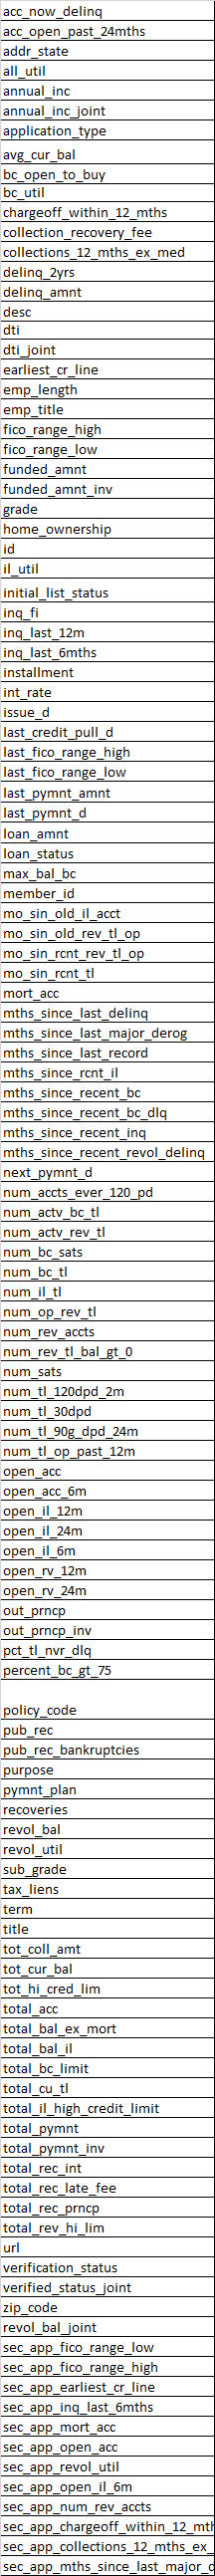

In [142]:
dd_loan = pd.read_excel('Data/LCDataDictionary.xlsx', sheetname = 0, skiprows=0)

In [143]:
dd_loan["LoanStatNew"]

0                            acc_now_delinq
1                      acc_open_past_24mths
2                                addr_state
3                                  all_util
4                                annual_inc
5                          annual_inc_joint
6                          application_type
7                               avg_cur_bal
8                            bc_open_to_buy
9                                   bc_util
10                 chargeoff_within_12_mths
11                  collection_recovery_fee
12               collections_12_mths_ex_med
13                              delinq_2yrs
14                              delinq_amnt
15                                     desc
16                                      dti
17                                dti_joint
18                         earliest_cr_line
19                               emp_length
20                                emp_title
21                          fico_range_high
22                           fic

In [140]:
dd_reject = pd.read_excel('Data/LCDataDictionary.xlsx', sheetname = 2)

In [144]:
dd_reject["RejectStats File"]

0        Amount Requested
1        Application Date
2              Loan Title
3              Risk_Score
4    Debt-To-Income Ratio
5                Zip Code
6                   State
7       Employment Length
8             Policy Code
Name: RejectStats File, dtype: object

## Resources

**Data & Company of data**

1. [Lending Club Data](https://www.lendingclub.com/info/download-data.action)

2. [About Lending Club](https://www.lendingclub.com/)

    a. [Wiki Lending Club](https://en.wikipedia.org/wiki/Lending_Club)
    
3. [Tax Brackets](https://taxfoundation.org/2017-tax-brackets/)

**SQL**
1. ['Case When' lazy logic'](https://dba.stackexchange.com/questions/43352/does-sql-server-case-statement-evaluate-all-conditions-or-exit-on-first-true-con)